<a href="https://colab.research.google.com/github/Elaine-Pwu/Sentiment-Analysis-Using-Text-Data/blob/main/110306081_%E8%B3%87%E7%AE%A1%E4%B8%89%E7%94%B2_%E8%92%B2%E4%BE%9D%E8%93%AE_%E7%BE%8E%E9%A3%9F%E8%A9%95%E8%AB%96%E8%AA%9E%E6%84%8F%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **美食評論語意分析**




資料來源是 [Amazon上的美食評論](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews/)

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##1. **資料匯入:**

首先，匯入5,000筆資料筆資料


 這裡使用`pandas`函式庫的`read_csv`函數將從Google Sheets中讀取的CSV資料匯入為DataFrame(`df`)。

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSQTObLDNCgJXxOgkqn6rx3bmh_Uq4ebvrjWSwhbXvjutyHJfDzxqSIgvEwY5XT5lCzyT0i3LqlBT1r/pub?gid=0&single=true&output=csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wide...


##2. **建立 Term Document Matrix:**

我們先利用 CountVectorizer 來建立 term document matrix。

因為資料是df 裡面的'Text'，所以，我們可以用以下指令把 term document X 給建立起來。

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Text'])

In [ ]:
X.shape

(5000, 13512)

我們看到資料有5,000 筆，13,512 是資料裡有 13,512 個不同的字。

---

如果我們想把一些沒有意義的字給移除，我們可以使用 stop words 來把不帶有訊息的介系詞連接詞等移除。

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Text'])
X.shape

(5000, 13220)

##3. **降維:**

使用截斷奇異值分解（Truncated SVD）進行降維，將文本表示為二維空間，方便後續的視覺化和分析。

>TruncatedSVD(n_components=2) 是指定要做出逼近的資料是降維到二維，lsa 就是降維後的結果。降維後的兩個方向是類似PCA 的混合後的方向，所以無法明確地說明是哪一個字詞造成這樣的分類。

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
lsa = svd.fit_transform(X)

In [ ]:
lsa.shape

(5000, 2)

In [ ]:
lsa[1:5,:]

array([[ 0.20547956, -0.41009846],
       [ 0.13898191, -0.24809401],
       [ 0.21468432, -0.56437519],
       [ 0.1434156 , -0.45782511]])

## 4. **視覺化:**

   將降維後的文本表示視覺化為散點圖，以便更好地理解文本的分佈情況。


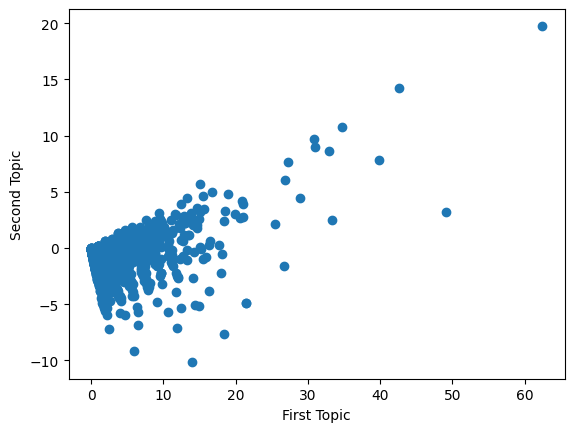

In [ ]:
plt.scatter(lsa[:,0], lsa[:,1])
plt.xlabel('First Topic')
plt.ylabel('Second Topic')

plt.show()

##5. **顯示字詞分佈:**

如果我們想看字詞的分佈，我們可以用以下的指令。

In [ ]:
lsa_t = svd.fit_transform(X.T)

In [ ]:
lsa_t.shape

(13220, 2)

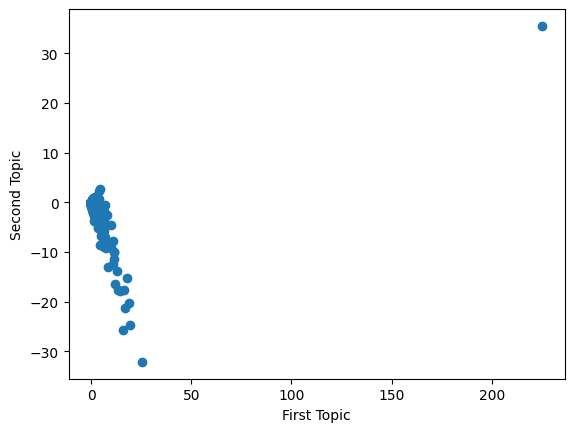

In [ ]:
plt.scatter(lsa_t[:,0], lsa_t[:,1])
plt.xlabel('First Topic')
plt.ylabel('Second Topic')

plt.show()

 這部分是展示字詞在降維空間中的分佈情況。

In [ ]:
A = np.array(lsa_t[:,0]>6)
true_list = np.nonzero(A)
print(true_list)

(array([  735,  1253,  1260,  1469,  1475,  1714,  1937,  2364,  2384,
        2585,  3211,  3846,  4045,  4585,  4783,  4790,  4886,  4980,
        5288,  5400,  5879,  6181,  6495,  6602,  6864,  6932,  7024,
        7136,  7558,  8112,  8208,  8932,  9057,  9121,  9459, 11408,
       11676, 11715, 11857, 11932, 12147, 12189, 12492, 12559, 12806]),)


In [ ]:
dictionary = vectorizer.get_feature_names_out()
dictionary[true_list]

array(['amazon', 'bag', 'bags', 'best', 'better', 'br', 'buy', 'chips',
       'chocolate', 'coffee', 'cup', 'don', 'eat', 'fat', 'flavor',
       'flavors', 'food', 'free', 'good', 'great', 'hot', 'ingredients',
       'just', 'know', 'like', 'little', 'love', 'make', 'mix', 'oil',
       'organic', 'potato', 'price', 'product', 'really', 'sugar',
       'taste', 'tea', 'think', 'time', 'tried', 'try', 'use', 've',
       'water'], dtype=object)

In [ ]:
A = np.array(lsa_t[:,1]>5)
true_list = np.nonzero(A)
print(true_list)
dictionary[true_list]

(array([1714]),)


array(['br'], dtype=object)

##6. **使用 TF-IDF 進行分析:**

使用 TF-IDF（Term Frequency-Inverse Document Frequency）進行文本特徵提取，這可以加權考慮字詞在整個文檔集合中的重要性。（token_pattern 的部分是剔除過短的字詞，參數中\w\w\w 連續三個\w 是我們只保留字詞長度大於等於3的字。）

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(token_pattern=r'\b\w\w\w+\b', min_df=0.08,stop_words='english')
X = vectorizer.fit_transform(df['Text'])

In [ ]:
X.shape

(5000, 28)

In [ ]:
dictionary = vectorizer.get_feature_names_out()
print(dictionary)

['amazon' 'bag' 'best' 'better' 'bought' 'buy' 'chips' 'coffee' 'don'
 'eat' 'flavor' 'food' 'good' 'great' 'just' 'like' 'little' 'love' 'make'
 'price' 'product' 'really' 'taste' 'time' 'tried' 'try' 'use' 'used']


##7. **TF-IDF 降維與視覺化:**

 再次使用 TruncatedSVD 對 TF-IDF 的表示進行降維和視覺化。

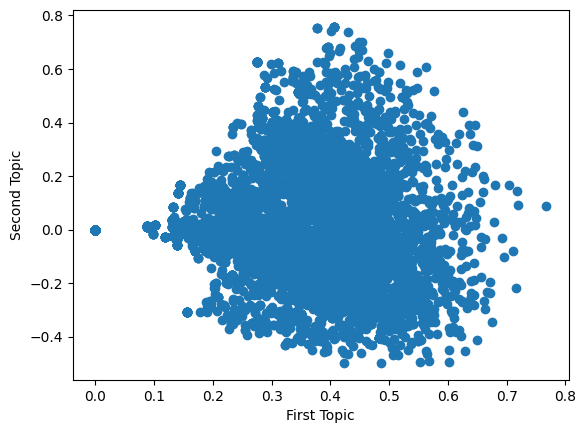

In [ ]:
svd = TruncatedSVD(n_components=2)
lsa = svd.fit_transform(X)
plt.scatter(lsa[:,0], lsa[:,1])
plt.xlabel('First Topic')
plt.ylabel('Second Topic')

plt.show()

##8. **篩選出特定條件的字詞:**

根據降維後的結果，篩選出滿足特定條件的字詞，以進一步分析和理解。

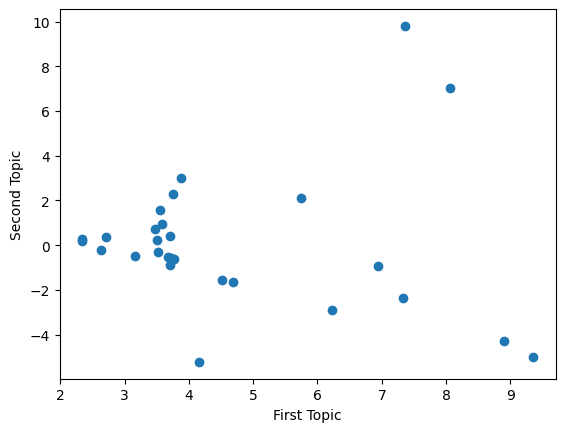

In [ ]:
lsa_t = svd.fit_transform(X.T)
plt.scatter(lsa_t[:,0], lsa_t[:,1])
plt.xlabel('First Topic')
plt.ylabel('Second Topic')

plt.show()

In [ ]:
A = np.array(lsa_t[:,1]>4)
true_list = np.nonzero(A)
print(true_list)
dictionary[true_list]

(array([13, 20]),)


array(['great', 'product'], dtype=object)

In [ ]:
A = np.array(lsa_t[:,0]>7)
true_list = np.nonzero(A)
print(true_list)
dictionary[true_list]

(array([12, 13, 15, 20, 22]),)


array(['good', 'great', 'like', 'product', 'taste'], dtype=object)

這裡可以看到連續出現的同義字，可見越推薦的正向內容會越出現在右邊的正方向。因此，我們可以猜測 X 的lsa 分佈在右邊的內容會是很正向的評論。

In [ ]:
A = np.array(lsa[:,1]>0.7)
true_list = np.nonzero(A)
print(true_list)

(array([  58,   63,  661, 1260, 1292, 1737, 1945, 2489, 2515, 3003, 3184,
       4084, 4094, 4196, 4375]),)


上列是 lsa 分佈在最右端的資料的index

##9. **展示文章內容:**

In [ ]:
df['Text'][58]

'Great product, nice combination of chocolates and perfect size! The bags had plenty, and they were shipped promptly. The kids in the neighborhood liked our candies!'

In [ ]:
df['Text'][4375]

'This is a great product! Hats off to Betty Crocker once again. They are becoming a more "MAIN STREAM" go-to company for people who are gluten free!'

In [ ]:
df['Text'][2515]

"This is a great product, so it's no surprise that the local shelves are often cleared of it, especially early in the season. Purchasing in bulk through amazon.com is a dependable alternative. Bayer 2-in-1 in granular form feeds roses and flowers while protecting them with a systemic insecticide for up to 6 weeks, but you'll need a separate fungicidal/disease treatment, and the systemic would not be something one would apply to anything edible. Bayer assures me the product is safe for pollinators and earthworms."

上列文章內容的評語都偏正向，這也展示了這個語意分析工具的能力。